In [4]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_over = pd.read_pickle('../data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [6]:
df_ts = pd.read_pickle('../data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [7]:
response_var = 'TenYearCHD'

### DECISION TREE CLASS CREATION

-----


In [8]:
class Decission_Tree():


    def __init__(self, dataframe, response_variable):

        self.dataframe = dataframe
        self.response_variable = response_variable


    def fitting_model(self):

        X = self.dataframe.drop(self.response_variable, axis = 1)
        y = self.dataframe[self.response_variable]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        my_tree = DecisionTreeClassifier(random_state =0)

        my_tree.fit(self.x_train, self.y_train)
        
        self.feat_names = list(self.x_train.columns)

        plt.figure(figsize = (40, 20))
        tree.plot_tree(my_tree, feature_names = self.feat_names, filled = True)
        plt.show()

        self.y_pred_test = my_tree.predict(self.x_test)
        self.y_pred_train = my_tree.predict(self.x_train)

        dicc_params = {'max_features': np.sqrt(len(self.x_train.columns)), 'max_depth': my_tree.tree_.max_depth}

        return dicc_params


    def metrics(self, model):
        
        accuracy_test = accuracy_score(self.y_test, self.y_pred_test)
        precision_test = precision_score(self.y_test, self.y_pred_test)
        recall_test = recall_score(self.y_test, self.y_pred_test)
        f1_test = f1_score(self.y_test, self.y_pred_test)
        kappa_test = cohen_kappa_score(self.y_test, self.y_pred_test)

        accuracy_train = accuracy_score(self.y_train, self.y_pred_train)
        precision_train = precision_score(self.y_train, self.y_pred_train)
        recall_train = recall_score(self.y_train, self.y_pred_train)
        f1_train = f1_score(self.y_train, self.y_pred_train)
        kappa_train = cohen_kappa_score(self.y_train, self.y_pred_train)
            
        dataframe = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                            'precision': [precision_test, precision_train],
                            'recall': [recall_test, recall_train], 
                            'f1': [f1_test, f1_train],
                            'kappa': [kappa_test, kappa_train],
                            'set': ['test', 'train']})
        
        dataframe['model'] = model

        return dataframe
    

    def defining_best_model(self, parameters):

        grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state= 42), 
                                param_grid= parameters, cv=10, verbose= False) 

        grid_search.fit(self.x_train, self.y_train)

        self.best_model = grid_search.best_estimator_

        print(self.best_model)

        plt.figure(figsize=(40, 20))
        tree.plot_tree(self.best_model, feature_names = self.feat_names, filled=True)
        plt.show()

    def applying_best_model(self, model):

        self.y_pred_test = self.best_model.predict(self.x_test)
        self.y_pred_train = self.best_model.predict(self.x_train)

        best_results_dataframe = self.metrics(model)

        return best_results_dataframe 


In [ ]:
decission_tree = Decission_Tree(df, response_var)

In [ ]:
decission_tree.preparing_data()

In [ ]:
decission_tree.fitting_model()

In [ ]:
decission_tree.metrics('Decission Tree')

In [ ]:
param = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

In [ ]:
decission_tree.defining_best_model(param)

In [ ]:
decission_tree.applying_best_model('Decision Tree best')

### DECISION TREE ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [9]:
X1 = df_over.drop(response_var, axis = 1)
y1 = df_over[response_var]

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [11]:
x_train1

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M
5660,0.5,0.0,0,0,1,0,0.571429,0.00,-0.465517,1.722222,...,0.533333,-0.214286,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
191,0.5,0.0,0,0,0,0,0.000000,0.15,-0.258621,0.055556,...,-1.000000,-0.928571,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2251,0.5,0.5,0,0,0,0,0.071429,0.00,0.431034,0.148148,...,-0.466667,-0.214286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
108,0.5,0.5,0,0,0,0,0.000000,1.00,0.931034,-0.018519,...,-0.133333,-0.214286,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
174,2.0,0.0,0,0,1,0,0.785714,0.00,0.672414,1.759259,...,-0.600000,0.071429,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.5,0.5,0,0,1,0,0.500000,2.00,-0.344828,0.685185,...,2.333333,0.642857,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5191,0.5,0.0,0,0,0,2,0.642857,0.00,0.448276,-1.592593,...,0.800000,9.142857,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5226,0.5,0.0,0,0,0,0,0.000000,0.50,0.448276,-0.203704,...,-0.800000,-0.928571,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5390,0.5,0.5,0,0,1,0,0.428571,0.00,-0.448276,2.277778,...,1.000000,0.571429,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [7]:
d_tree = DecisionTreeClassifier(random_state =0)

d_tree.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

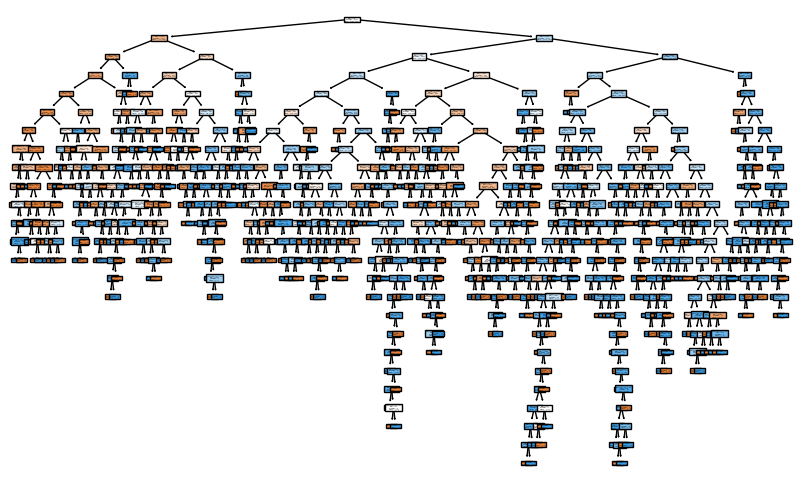

In [8]:
feat_names = list(x_train1.columns)

fig = plt.figure(figsize = (10,6))
tree.plot_tree(d_tree, feature_names = feat_names, filled = True)
plt.show()

In [9]:
print(d_tree.tree_.max_depth)

24


In [10]:
y_pred_test_1 = d_tree.predict(x_test1)
y_pred_train_1 = d_tree.predict(x_train1)

In [11]:
def metrics(real_classes_test, predicted_classes_test, real_classes_train, predicted_classes_train, model):
    
    accuracy_test = accuracy_score(real_classes_test, predicted_classes_test)
    precision_test = precision_score(real_classes_test, predicted_classes_test)
    recall_test = recall_score(real_classes_test, predicted_classes_test)
    f1_test = f1_score(real_classes_test, predicted_classes_test)
    kappa_test = cohen_kappa_score(real_classes_test, predicted_classes_test)

    accuracy_train = accuracy_score(real_classes_train, predicted_classes_train)
    precision_train = precision_score(real_classes_train, predicted_classes_train)
    recall_train = recall_score(real_classes_train, predicted_classes_train)
    f1_train = f1_score(real_classes_train, predicted_classes_train)
    kappa_train = cohen_kappa_score(real_classes_train, predicted_classes_train)
        
    dataframe = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                        'precision': [precision_test, precision_train],
                        'recall': [recall_test, recall_train], 
                        'f1': [f1_test, f1_train],
                        'kappa': [kappa_test, kappa_train],
                        'set': ['test', 'train']})
    
    dataframe['model'] = model
    return dataframe

In [12]:
dt_results1 = metrics(y_test1, y_pred_test_1, y_train1, y_pred_train_1, 'OVER Decission Tree')
dt_results1

,accuracy,precision,recall,f1,kappa,set,model
0,0.900463,0.832341,0.996437,0.907027,0.801767,test,OVER Decission Tree
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,OVER Decission Tree


In [13]:
param_over = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

In [14]:
gs_over = GridSearchCV(estimator=DecisionTreeClassifier(random_state= 42), 
                param_grid= param_over, 
                cv=10, 
                verbose= False) 

In [15]:
gs_over.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=False)

In [16]:
best_model = gs_over.best_estimator_
best_model

DecisionTreeClassifier(max_depth=12, max_features=5, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

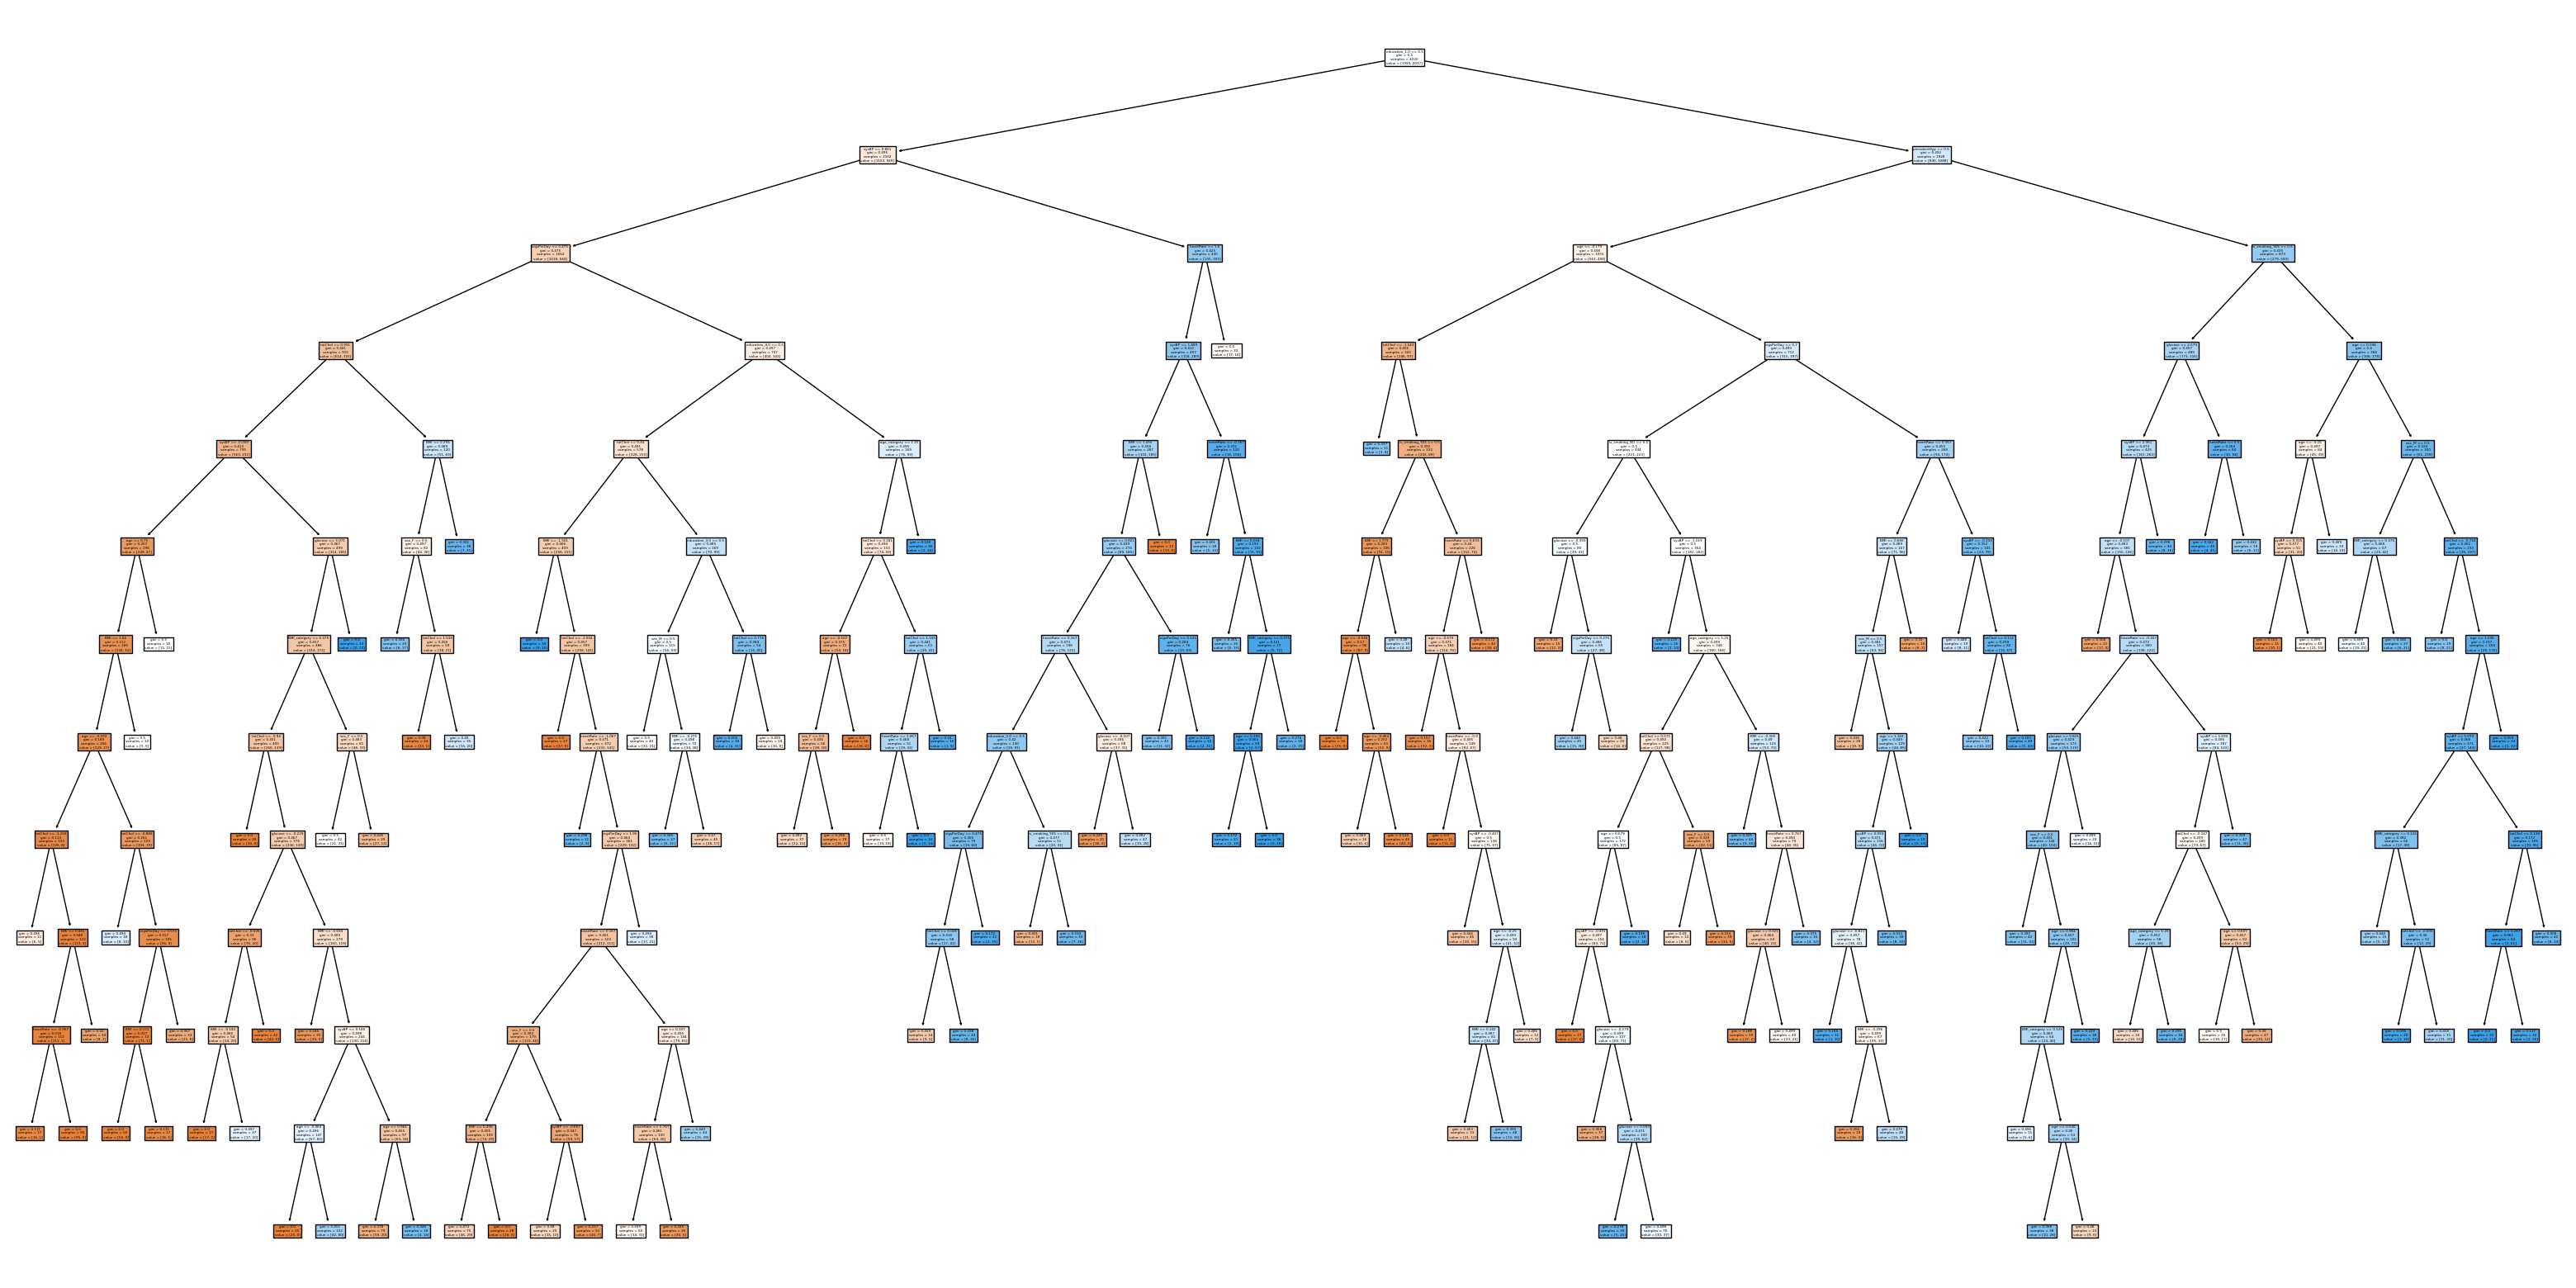

In [17]:
fig_over = plt.figure(figsize=(40, 20))
tree.plot_tree(best_model, feature_names= feat_names, filled=True);

In [18]:
y_pred_test_1 = best_model.predict(x_test1)
y_pred_train_1 = best_model.predict(x_train1)

In [19]:
dt_over_results = metrics(y_test1, y_pred_test_1, y_train1,  y_pred_train_1, 'OVER Decision Tree')
dt_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.725694,0.712471,0.732779,0.722482,0.451421,test,OVER Decision Tree
1,0.756328,0.754954,0.766814,0.760838,0.512512,train,OVER Decision Tree


### DECISION TREE ON TOKEN_SMOTE DATAFRAME

-----


### SAVE RESULTS

-----


In [36]:
lr_results = pd.read_pickle('../data/LR_results.pkl')
lr_results.head()

,accuracy,precision,recall,f1,kappa,set,model
0,0.674190,0.665874,0.665083,0.665478,0.347938,test,OVER Logistic Regression
1,0.668734,0.669075,0.681885,0.675419,0.337250,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [37]:
all_results = pd.concat([lr_results, dt_over_results, dt_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.674190,0.665874,0.665083,0.665478,0.347938,test,OVER Logistic Regression
1,0.668734,0.669075,0.681885,0.675419,0.337250,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression
0,0.725694,0.712471,0.732779,0.722482,0.451421,test,OVER Decision Tree
1,0.756328,0.754954,0.766814,0.760838,0.512512,train,OVER Decision Tree
0,0.729597,0.310241,0.691275,0.428274,0.283327,test,TS Decision Tree
1,0.740413,0.341250,0.754144,0.469880,0.328918,train,TS Decision Tree


In [38]:
all_results.to_csv('../data/LR_DT_results.pkl')